In [ ]:
# Uploading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Replace 'your_file_path.csv' with the actual path to your CSV file
# file_path = 'PersonalFinance.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv("PersonalFinance.csv")

In [ ]:
df

,Customer ID,Gender,Age,Annual Income(k$),Spending Score (1 - 100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
print(df.shape)

(5, 5)


In [ ]:
df1=df.copy() # Create a copy of the original DataFrame

In [ ]:
df["Customer ID"]

,Customer ID
0,1
1,2
2,3
3,4
4,5


In [ ]:
df["Age"]

,Age
0,19
1,21
2,20
3,23
4,31


In [ ]:
# df["Age"]=df["Age"]**2

In [ ]:
# import math
# df["Age"]=lambda x:math.sqrt(df["Age"])

In [ ]:
df

,Customer ID,Gender,Age,Annual Income(k$),Spending Score (1 - 100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df["new Feature"]=df["Age"]*df["Annual Income(k$)"]

In [ ]:
df

,Customer ID,Gender,Age,Annual Income(k$),Spending Score (1 - 100),new Feature
0,1,Male,19,15,39,285
1,2,Male,21,15,81,315
2,3,Female,20,16,6,320
3,4,Female,23,16,77,368
4,5,Female,31,17,40,527


In [ ]:
column_name = 'Annual Income(k$)'
desired_column = df[column_name]*2

print(desired_column)


0    30
1    30
2    32
3    32
4    34
Name: Annual Income(k$), dtype: int64


In [ ]:
var=list(df.columns)
type(var)

list

In [ ]:
df = pd.read_csv("PersonalFinance.csv")

In [ ]:
#df = df.rename(columns={'Spending Score (1 - 100)': 'Spending Score'},inplace=True)
df = df.rename(columns={'Annual Income(k$)': 'Annual Income','Spending Score (1 - 100)': 'Spending Score'})
df
#df = df.rename(columns={'Annual Income': 'Annual Income1'},errors="raise")
# df = df.rename(columns={'Spending Score (1 - 100)': 'Spending Score'})
# df

,Customer ID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.drop(columns=['new Feature'],inplace=True)

In [ ]:
df.drop(columns=['Age'])


,Customer ID,Gender,Annual Income,Spending Score
0,1,Male,15,39
1,2,Male,15,81
2,3,Female,16,6
3,4,Female,16,77
4,5,Female,17,40


In [ ]:
df

,Customer ID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
y = df['Spending Score'] # Extracting target variable column
X = df.drop(columns=['Spending Score']) # Creating training variable by dropping target variable column

In [ ]:
X

,Customer ID,Gender,Age,Annual Income
0,1,Male,19,15
1,2,Male,21,15
2,3,Female,20,16
3,4,Female,23,16
4,5,Female,31,17


In [ ]:
y

,Spending Score
0,39
1,81
2,6
3,77
4,40


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=42,shuffle=True)

# Print the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4, 4)
X_test shape: (1, 4)
y_train shape: (4,)
y_test shape: (1,)


In [ ]:
X_train

,Customer ID,Gender,Age,Annual Income
4,5,Female,31,17
2,3,Female,20,16
0,1,Male,19,15
3,4,Female,23,16


In [ ]:
X_test

,Customer ID,Gender,Age,Annual Income
1,2,Male,21,15


In [ ]:
y_train

,Spending Score
4,40
2,6
0,39
3,77


In [ ]:
y_test

,Spending Score
1,81


Y = mX + C  , X =2, m =1, C =0

Y = 1*2 + 0

Y = 2

def labelencoder(X,m):
      C=0
      y = mX+C


labelencoder(2,1)

labelencoder.fit(X_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X_train['Gender'] =labelencoder.fit_transform(X_train['Gender'])
X_test['Gender']  = labelencoder.fit_transform(X_test['Gender'])

# Print the encoded data
print(X_train)
print(X_test)


   Customer ID  Gender  Age  Annual Income
4            5       0   31             17
2            3       0   20             16
0            1       1   19             15
3            4       0   23             16
   Customer ID  Gender  Age  Annual Income
1            2       0   21             15


In [ ]:
## Value ##         ## Result ##
#(1/1)          --    1                      Customer ID
#(1/5)          --    0.2                    Customer ID

#               --    0                      Gender
#               --    1                      Gender

#(1/31)         --    0.03225                Age
#(1/19)         --    0.052631               Age

#(1/17)         --    0.05882                Annual Income
#(1/15)         --    0.0667                 Annual Income

In [ ]:
# prompt: Support vector machine regressor fitting data

from sklearn.svm import SVR  # SVR = Support Vector Regressor
                             # SVM = Support Vector Machine

# Instantiate the SVR model
svm_model = SVR(kernel='sigmoid')
#'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Predict the target values for the test data
svm_prediction = svm_model.predict(X_test)

# Print the predicted values
print("SVM_Prediction :", svm_prediction)

from sklearn.metrics import mean_absolute_error
svm_mae = mean_absolute_error(y_test, svm_prediction) # y_test = 81
print("SVM Mean Absolute Error:", svm_mae)


SVM_Prediction : [39.51683573]
SVM Mean Absolute Error: 41.48316427323584


Percentage error = [(81 -39.51683573)/81] x 100
                    41.48316427/81

In [ ]:
81-39.51683573

41.48316427

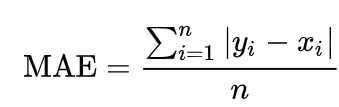

In [ ]:
# prompt: svm mean absolute error

from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate the mean absolute error
#svm_mae = mean_absolute_error(y_test, svm_prediction)
Mean_Sqrd_Error=mean_squared_error(y_test, svm_prediction)
RMSE = sqrt(Mean_Sqrd_Error)

# Print the mean absolute error
print("Root Mean Squard Error:", RMSE)


Root Mean Squard Error: 41.48316427323584


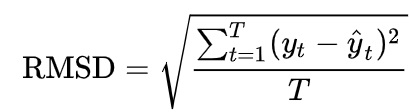

In [ ]:
(41.4831642732/81)*100

51.21378305333334

In [ ]:
Details = {'Customer ID': [50], 'Gender':[1], 'Age':[75],'Annual Income':[500]}
PerFinNew=pd.DataFrame.from_dict(Details)
PerFinNew
svm_prediction1 = svm_model.predict(PerFinNew)
print(svm_prediction1)


[39.44711387]


In [ ]:
from sklearn.tree import DecisionTreeRegressor # Importing model from library
dt_model = DecisionTreeRegressor()             # Calling object of model class
dt_model.fit(X_train,y_train)                  # Fitting training data into the model
dt_prediction = dt_model.predict(X_test)       # Predicting unknown data using model
dt_mae = mean_absolute_error(y_test,dt_prediction) # Calculating mean absolute error
print("prediction value :",dt_prediction)
print("MAE :",dt_mae)
Mean_Sqrd_Error_dt=mean_squared_error(y_test, dt_prediction) # Calculating mean squared error
RMSE = sqrt(Mean_Sqrd_Error_dt)                # Calculating square root of mean squared error
print(RMSE)

prediction value : [39.]
MAE : 42.0
42.0


In [ ]:
81-39

42

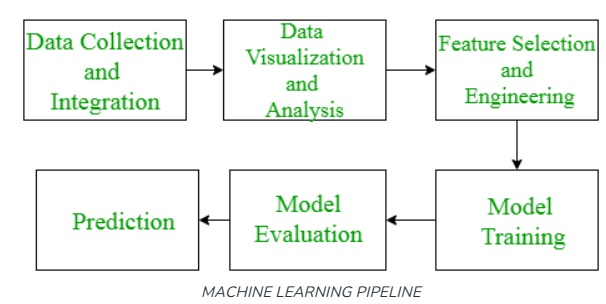

Which type of vehicle
Time of fuel filling
Amount of fuel filled
Segment of vehicle for fuel filling

1. Machine Learning
2. Deep Learning
3. Generative AI

In [ ]:
!curl -s -XPOST "https://jobinvarghese.app.modelbit.com/v1/predict_loan_default/latest" -d '{"data": [32, 821233, 689, 1, 10789]}' | json_pp

{
   "data" : [
      4.28870351436048e-27
   ]
}


##Dropping Customer ID from the dataset and then testing with algorithm ##

In [ ]:
X_testcustom=X_test.drop(columns="Customer ID")

In [ ]:
X_traincustom = X_train.drop(columns="Customer ID")

In [ ]:
y_traincustom =y_train.drop(columns="Customer ID")

In [ ]:
print(X_testcustom)
print(X_traincustom)
#print(y_traincustom)

   Gender  Age  Annual Income
1       0   21             15
   Gender  Age  Annual Income
4       0   31             17
2       0   20             16
0       1   19             15
3       0   23             16


In [ ]:
lr_model1=LinearRegression()

In [ ]:
lr_model1.fit(X_traincustom, y_train)

lr_prediction1 = lr_model1.predict(X_testcustom)

lr_prediction1

array([256.])

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

lr_prediction = lr_model.predict(X_test)

lr_prediction

# lr_mae = mean_absolute_error(y_test, lr_prediction)

# lr_mae # 21.162694166396186

array([65.86666667])

In [ ]:
y_test

,Spending Score
1,81


In [ ]:
X_test

,Customer ID,Gender,Age,Annual Income
1,2,0,21,15


In [ ]:
print("The accuracy of the linear regression model is: ",(65.86666667/81)*100)

The accuracy of the linear regression model is:  81.31687243209876


In [ ]:
from sklearn.metrics import mean_absolute_error
Linearreg = mean_absolute_error(y_test, lr_prediction) # y_test = 81
print("LR Mean Absolute Error:", Linearreg)

LR Mean Absolute Error: 15.133333333333212


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate the mean absolute error
#svm_mae = mean_absolute_error(y_test, svm_prediction)
Mean_Sqrd_Error_lr=mean_squared_error(y_test, lr_prediction)
RMSE = sqrt(Mean_Sqrd_Error_lr)

# Print the mean absolute error
print("Root Mean Squard Error:", RMSE)


Root Mean Squard Error: 15.133333333333212


In [ ]:
sqrt(((81-65.666667)^2))

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

std_X_train = pd.DataFrame(std_scaler.fit_transform(X_train),columns =X_train.columns,index =X_train.index)
print("Standardized X train is : ", std_X_train)

# std_y_train = pd.DataFrame(std_scaler.fit_transform(y_train),columns =y_train.columns,index =y_train.index)
# print("Standardized y train is : ", std_y_train)

std_X_test = pd.DataFrame(std_scaler.fit_transform(X_test),columns =X_test.columns,index =X_test.index)
print("Standardized X train is : ", std_X_test)


# Normal Distribution

Standardized X train is :     Customer ID    Gender       Age  Annual Income
2     0.267261 -0.707107 -0.392232       0.707107
0    -1.336306  1.414214 -0.980581      -1.414214
3     1.069045 -0.707107  1.372813       0.707107
Standardized X train is :     Customer ID  Gender  Age  Annual Income
1         -1.0     1.0 -1.0           -1.0
4          1.0    -1.0  1.0            1.0


In [ ]:
from sklearn.linear_model import LinearRegression

lr_model_std = LinearRegression()

lr_model_std.fit(std_X_train, y_train)

lr_prediction_std = lr_model_std.predict(std_X_test)

lr_prediction_std

# lr_mae = mean_absolute_error(y_test, lr_prediction)

# lr_mae # 21.162694166396186

array([27.74491059, 53.58842274])

In [ ]:
from sklearn.svm import SVR
svm_model=SVR()
svm_model.fit(std_X_train, y_train)

new_svm_prediction = svm_model.predict(std_X_test)
new_svm_prediction

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, new_svm_prediction)

21.3125762666249

In [ ]:
from sklearn.tree import DecisionTreeRegressor # Importing model from library
dt_model = DecisionTreeRegressor()             # Calling object of model class
dt_model.fit(std_X_train,y_train)                  # Fitting training data into the model
dt_prediction = dt_model.predict(std_X_test)       # Predicting unknown data using model
dt_mae = mean_absolute_error(y_test,dt_prediction) # Calculating mean absolute error
print("prediction value :",dt_prediction)
print("MAE :",dt_mae)

from sklearn.metrics import mean_squared_error
from math import sqrt

Mean_Sqrd_Error_dt=mean_squared_error(y_test, dt_prediction) # Calculating mean squared error
RMSE = sqrt(Mean_Sqrd_Error_dt)                # Calculating square root of mean squared error
print("Root mean Squared error : ", RMSE)

prediction value : [39. 77.]
MAE : 39.5
Root mean Squared error :  39.5790348543266


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Gender'] =labelencoder.fit_transform(df['Gender'])
#X_test['Gender']  = labelencoder.fit_transform(X_test['Gender'])

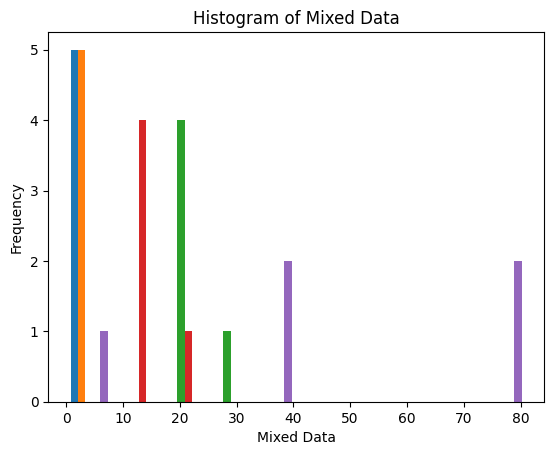

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df)

plt.xlabel("Mixed Data")
plt.ylabel("Frequency")
plt.title("Histogram of Mixed Data")

plt.show()